# **TikTok Project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

You are a data professional at TikTok. The data team is working towards building a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and hypothesis testing.

The TikTok team has reviewed the results of the hypothesis testing. TikTok’s Operations Lead, Maika Abadi, is interested in how different variables are associated with whether a user is verified. Earlier, the data team observed that if a user is verified, they are much more likely to post opinions. Now, the data team has decided to explore how to predict verified status to help them understand how video characteristics relate to verified users. Therefore, you have been asked to conduct a logistic regression using verified status as the outcome variable. The results may be used to inform the final model related to predicting whether a video is a claim vs an opinion.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 5 End-of-course project: Regression modeling**


In this activity, you will build a logistic regression model in Python. As you have learned, logistic regression helps you estimate the probability of an outcome. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed.

<br/>

**The purpose** of this project is to demostrate knowledge of EDA and regression models.

**The goal** is to build a logistic regression model and evaluate the model.
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a logistic regression model?
  * EDA serves as a method of clarifying the data dictionary and providing insights before building the Model. We get a clearer picture of what parts of the data are relevant to the problem statement!

**Part 2:** Model Building and Evaluation
* What resources do you find yourself using as you complete this stage?
  * I find myself using libraries such as sklearn, seaborn, and numpy in order to clean the data, reshape the data, train the model, and using test data to examine the training data's validity.

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?
  * need to complete

* What business recommendations do you propose based on the models built?
  * need to complete

Follow the instructions and answer the question below to complete the activity. Then, you will complete an executive summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.


# **Build a regression model**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**
Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

### **Task 1. Imports and loading**
Import the data and packages that you've learned are needed for building regression models.

In [1]:
# Import packages for data manipulation
### YOUR CODE HERE ###
# dont remember why?
# dont remember because dont practice EVERY DAY
# dont practice every day why??
# dont practice every day because no need to?
# no need to why?
# no need to wrong
# ok
# do need to because i want to be data professional with software engineering knowledge.
# ok so practice every day!
# even weekends....
# import numpy as np



# Import packages for data visualization
### YOUR CODE HERE ###
# import seaborn as sns
# import matplotlib.pyplot as plt

# Import packages for data preprocessing
### YOUR CODE HERE ###
# import pandas as pd



# Import packages for data modeling
### YOUR CODE HERE ###
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression


In [66]:
# data preprocessing and visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# time formatting
from datetime import datetime
from datetime import date
from datetime import timedelta

# data preprocessing
from sklearn.utils import resample
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# packages for OLS, MLR and confusion matrices. ols library may be different from the one we used previously!
from sklearn.preprocessing import StandardScaler # not sure
from sklearn.model_selection import train_test_split # for train test split!
import sklearn.metrics as metrics # for confusion matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report


Load the TikTok dataset.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# Load dataset into dataframe
df = pd.read_csv("tiktok_dataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a logistic regression model?


==> ENTER YOUR RESPONSE HERE

### **Task 2a. Explore data with EDA**

Analyze the data and check for and handle missing values and duplicates.

Inspect the first five rows of the dataframe.

In [4]:
# Display first few rows
### YOUR CODE HERE ###
df0 = df
df.head(5)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Get the number of rows and columns in the dataset.

In [5]:
# Get number of rows and columns
### YOUR CODE HERE ###
df.shape

(19382, 12)

Get the data types of the columns.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Get basic information about the dataset.

In [7]:
# Get basic information
### YOUR CODE HERE ###
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [8]:
# Generate basic descriptive stats
### YOUR CODE HERE ###
df.describe()


,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Check for and handle missing values.

In [9]:
# Check for missing values
### YOUR CODE HERE ###
df.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [10]:
df.shape

(19382, 12)

In [11]:
# Drop rows with missing values
### YOUR CODE HERE ###
df = df.dropna()
df.isna().sum()

#                           0
claim_status                0
video_id                    0
video_duration_sec          0
video_transcription_text    0
verified_status             0
author_ban_status           0
video_view_count            0
video_like_count            0
video_share_count           0
video_download_count        0
video_comment_count         0
dtype: int64

In [12]:
# Display first few rows after handling missing values
### YOUR CODE HERE ###
df.head(50)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
5,6,claim,8972200955,35,someone shared with me that gross domestic pro...,not verified,under review,336647.0,175546.0,62303.0,4293.0,1857.0
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.0,486192.0,193911.0,8616.0,5446.0
7,8,claim,2270982263,41,someone shared with me that the best selling s...,not verified,active,547532.0,1072.0,50.0,22.0,11.0
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.0,10160.0,1050.0,53.0,27.0
9,10,claim,4660861094,45,someone shared with me that it would take a 50...,verified,active,931587.0,171051.0,67739.0,4104.0,2540.0


Check for and handle duplicates.

In [13]:
# Check for duplicates
### YOUR CODE HERE ###
df.duplicated().value_counts()

False    19084
Name: count, dtype: int64

Check for and handle outliers.

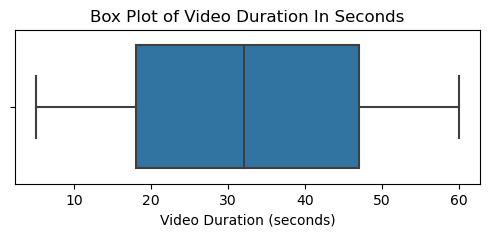

In [14]:
# Create a boxplot to visualize distribution of `video_duration_sec`
### YOUR CODE HERE ###
plt.figure(figsize=(6,2))
sns.boxplot(data=df, x='video_duration_sec')
plt.title('Box Plot of Video Duration In Seconds')
plt.xlabel('Video Duration (seconds)')
plt.show()


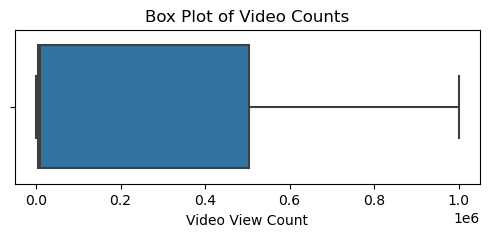

In [15]:
# Create a boxplot to visualize distribution of `video_view_count`
### YOUR CODE HERE ###
plt.figure(figsize=(6,2))
sns.boxplot(data=df, x='video_view_count')
plt.title('Box Plot of Video Counts')
plt.xlabel('Video View Count')
plt.show()



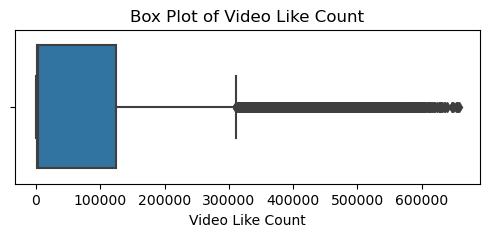

In [16]:
# Create a boxplot to visualize distribution of `video_like_count`
### YOUR CODE HERE ###
plt.figure(figsize=(6,2))
sns.boxplot(data=df, x='video_like_count')
plt.title('Box Plot of Video Like Count')
plt.xlabel('Video Like Count')
plt.show()



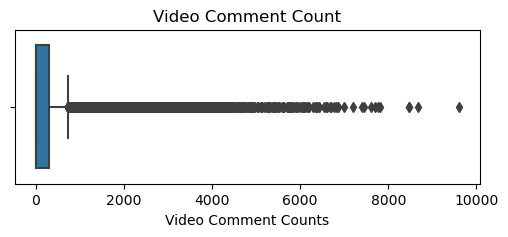

In [17]:
# Create a boxplot to visualize distribution of `video_comment_count`
### YOUR CODE HERE ###
plt.figure(figsize=(6,2))
sns.boxplot(data=df, x='video_comment_count')
plt.title('Video Comment Count')
plt.xlabel('Video Comment Counts')
plt.show()



In [18]:
# checking and handling outliers!
percentile25 = df['video_like_count'].quantile(0.25)
percentile75 = df['video_like_count'].quantile(0.75)

iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr

df.loc[df['video_like_count'] > upper_limit, 'video_like_count'] = upper_limit

print(percentile25)
print(percentile75)
print(iqr)
print(upper_limit)

810.75
125020.0
124209.25
311333.875


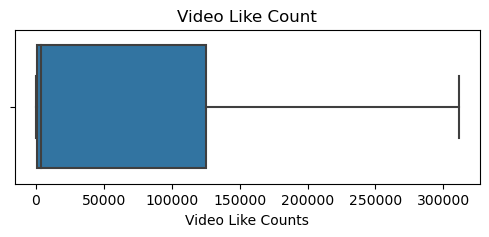

In [19]:
plt.figure(figsize=(6,2))
sns.boxplot(data=df, x='video_like_count')
plt.title('Video Like Count')
plt.xlabel('Video Like Counts')
plt.show()

Check class balance.

In [20]:
# Check class balance for video_comment_count
### YOUR CODE HERE ###
iqr = df['video_comment_count'].quantile(0.75) - df['video_comment_count'].quantile(0.25)
upper_limit = df['video_comment_count'].quantile(0.75) + 1.5 * iqr

df.loc[df['video_comment_count'] > upper_limit, 'video_comment_count'] = upper_limit





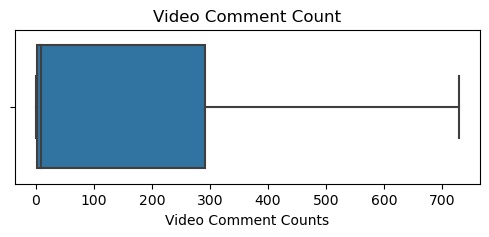

In [21]:
plt.figure(figsize=(6,2))
sns.boxplot(data=df, x='video_comment_count')
plt.title('Video Comment Count')
plt.xlabel('Video Comment Counts')
plt.show()


In [22]:
df['verified_status'].value_counts(normalize=True)

verified_status
not verified    0.93712
verified        0.06288
Name: proportion, dtype: float64

Approximately 94.2% of the dataset represents videos posted by unverified accounts and 5.8% represents videos posted by verified accounts. So the outcome variable is not very balanced.

Use resampling to create class balance in the outcome variable, if needed.

In [23]:
# Use resampling to create class balance in the outcome variable, if needed

# In other words, split the outcome variable into 
# Identify data points from majority and minority classes
### YOUR CODE HERE ###
majority = df[df['verified_status'] == 'not verified']
minority = df[df['verified_status'] == 'verified']

# Upsample the minority class (which is "verified")
### YOUR CODE HERE ###
minority_upsampled = resample(minority, 
                             replace=True,              # sample WITH replacement
                             n_samples=len(majority),   # match majority class
                            random_state=0)             #reproduce result

# Combine majority class with upsampled minority class
### YOUR CODE HERE ###
upsampled = pd.concat([majority, minority_upsampled]).reset_index()

# Display new class counts
### YOUR CODE HERE ###
upsampled.head(100)


,index,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.000,241.0,1.0,0.0
1,1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.000,19034.0,1161.0,684.0
2,2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.000,2858.0,833.0,329.0
3,3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.000,34812.0,1234.0,584.0
4,4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.000,4110.0,547.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,97,98,claim,4415434682,16,a friend mentioned someone discovered that the...,not verified,under review,423164.0,186423.000,55246.0,2404.0,728.5
96,98,99,claim,3490110525,57,a friend mentioned someone discovered that abo...,not verified,under review,182650.0,88712.000,28801.0,434.0,95.0
97,99,100,claim,8089681692,49,a friend mentioned someone discovered that an ...,not verified,active,195432.0,27339.000,3483.0,433.0,200.0
98,100,101,claim,8266347544,9,a friend mentioned someone discovered that the...,not verified,active,90931.0,51974.000,3568.0,970.0,156.0


Get the average `video_transcription_text` length for videos posted by verified accounts and the average `video_transcription_text` length for videos posted by unverified accounts.



In [24]:
### YOUR CODE HERE ###

# INSTRUCTIONS ARE WRONG
# Get the average 'video_transcription_text' length for verified and the average 'video_transcription_text' length
# for opinions



# upsampled
# No need to learn about claims (yet)

# claim_status --> opinion + claim  |  IRRELEVANT (for now)

# brute force
verified = upsampled[upsampled['verified_status'] == 'verified']
not_verified = upsampled[upsampled['verified_status'] == 'not verified']
verified_mean = verified['video_transcription_text'].str.len().mean()
not_verified_mean = not_verified['video_transcription_text'].str.len().mean()



print('Verified AVERAGE:', verified_mean)
print('Unverified AVERAGE: ', not_verified_mean)

print()

# ONE LINER SOLUTION! very effective!
# takes verified status and video transcription text,
# groups them by verified status
# applies an aggregate function through a lambda function. (think: .sum())
upsampled[['verified_status', 'video_transcription_text']].groupby('verified_status').agg(lambda x: np.mean([len(text) for text in x]))



Verified AVERAGE: 84.56955938268844
Unverified AVERAGE:  89.40114068441065



,video_transcription_text
verified_status,
not verified,89.401141
verified,84.569559


Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [25]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
### YOUR CODE HERE ###
upsampled.insert(6, 'video_transcription_length', upsampled['video_transcription_text'].str.len())


In [26]:
# Display first few rows of dataframe after adding new column
### YOUR CODE HERE ###
upsampled.head()


,index,#,claim_status,video_id,video_duration_sec,video_transcription_text,video_transcription_length,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,97,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,1,2,claim,4014381136,32,someone shared with me that there are more mic...,107,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,2,3,claim,9859838091,31,someone shared with me that american industria...,137,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,131,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,4,5,claim,7105231098,19,someone shared with me that the number of busi...,128,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts.

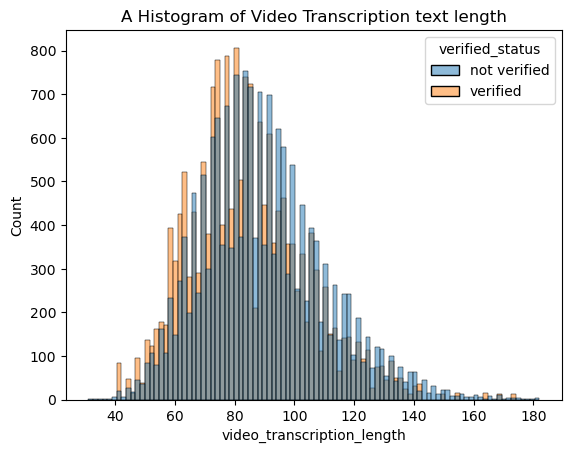

In [27]:
# Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts
# Create two histograms in one plot
### YOUR CODE HERE ###
sns.histplot(data=upsampled, x='video_transcription_length', hue='verified_status')
plt.title('A Histogram of Video Transcription text length')
plt.show()

In [28]:
upsampled.head()

,index,#,claim_status,video_id,video_duration_sec,video_transcription_text,video_transcription_length,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,97,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,1,2,claim,4014381136,32,someone shared with me that there are more mic...,107,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,2,3,claim,9859838091,31,someone shared with me that american industria...,137,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,131,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,4,5,claim,7105231098,19,someone shared with me that the number of busi...,128,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


### **Task 2b. Examine correlations**

Next, code a correlation matrix to help determine most correlated variables.

In [29]:
# Code a correlation matrix to help determine most correlated variables
### YOUR CODE HERE ###
df_cm = upsampled.drop(columns=['index', '#', 'video_id'])
corr_mat = df_cm.corr(numeric_only=True)



Visualize a correlation heatmap of the data.

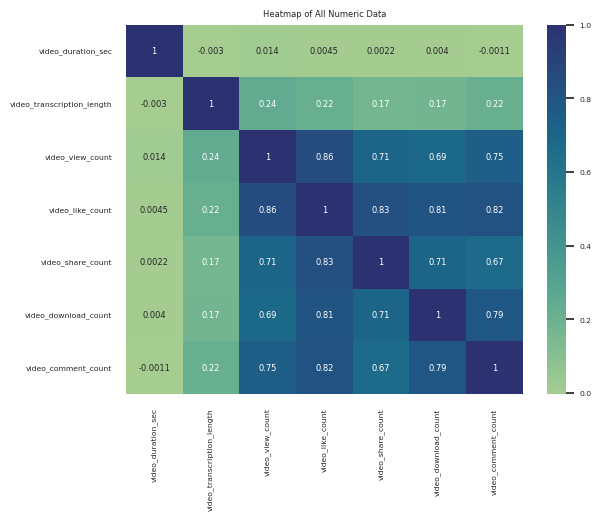

In [30]:
# Create a heatmap to visualize how correlated variables are
### YOUR CODE HERE ###

sns.set(font_scale=0.5)
sns.heatmap(corr_mat, annot=True, cmap='crest')
plt.title('Heatmap of All Numeric Data')
plt.show()

One of the model assumptions for logistic regression is no severe multicollinearity among the features. Take this into consideration as you examine the heatmap and choose which features to proceed with.

**Question:** What variables are shown to be correlated in the heatmap?

- video_comment_count and
  - video_download_count
  - video_share_count
  - video_like_count
  - video_view_count
- video_comment_count and
  - video_share count
  - video_like_count
  - video_view_count


<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3a. Select variables**

Set your Y and X variables.

Select the outcome variable.

In [31]:
# Select outcome variable
### YOUR CODE HERE ###
y = upsampled['verified_status']
y

0        not verified
1        not verified
2        not verified
3        not verified
4        not verified
             ...     
35763        verified
35764        verified
35765        verified
35766        verified
35767        verified
Name: verified_status, Length: 35768, dtype: object

Select the features.

In [32]:
# Select features
### YOUR CODE HERE ###
X = upsampled[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count", "video_share_count", "video_download_count", "video_comment_count", "video_transcription_length"]]
X.shape, X.head()
# Display first few rows of features dataframe
### YOUR CODE HERE ###


((35768, 8),
    video_duration_sec claim_status author_ban_status  video_view_count  \
 0                  59        claim      under review          343296.0   
 1                  32        claim            active          140877.0   
 2                  31        claim            active          902185.0   
 3                  25        claim            active          437506.0   
 4                  19        claim            active           56167.0   
 
    video_share_count  video_download_count  video_comment_count  \
 0              241.0                   1.0                  0.0   
 1            19034.0                1161.0                684.0   
 2             2858.0                 833.0                329.0   
 3            34812.0                1234.0                584.0   
 4             4110.0                 547.0                152.0   
 
    video_transcription_length  
 0                          97  
 1                         107  
 2                        

### **Task 3b. Train-test split**

Split the data into training and testing sets.

In [33]:
# Split the data into training and testing sets
### YOUR CODE HERE ###
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

Confirm that the dimensions of the training and testing sets are in alignment.

In [34]:
# Get shape of each training and testing set
### YOUR CODE HERE ###
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26826, 8), (8942, 8), (26826,), (8942,))

### **Task 3c. Encode variables**

Check the data types of the features.

In [35]:
# Check data types
### YOUR CODE HERE ###
X_train.dtypes


video_duration_sec              int64
claim_status                   object
author_ban_status              object
video_view_count              float64
video_share_count             float64
video_download_count          float64
video_comment_count           float64
video_transcription_length      int64
dtype: object

In [36]:
# Get unique values in `claim_status`
### YOUR CODE HERE ###
X_train['claim_status']



33058    opinion
20491    opinion
25583    opinion
18474    opinion
27312    opinion
          ...   
20757    opinion
32103    opinion
30403    opinion
21243    opinion
2732       claim
Name: claim_status, Length: 26826, dtype: object

In [37]:
# Get unique values in `author_ban_status`
### YOUR CODE HERE ###
X_train['author_ban_status']

33058    active
20491    active
25583    active
18474    active
27312    active
          ...  
20757    active
32103    active
30403    active
21243    active
2732     banned
Name: author_ban_status, Length: 26826, dtype: object

As shown above, the `claim_status` and `author_ban_status` features are each of data type `object` currently. In order to work with the implementations of models through `sklearn`, these categorical features will need to be made numeric. One way to do this is through one-hot encoding.

Encode categorical features in the training set using an appropriate method.

In [38]:
# Select the training features that needs to be encoded
### YOUR CODE HERE ###
X_train_to_encode = X_train[['claim_status', 'author_ban_status']]

# Display first few rows
### YOUR CODE HERE ###
X_train_to_encode

,claim_status,author_ban_status
33058,opinion,active
20491,opinion,active
25583,opinion,active
18474,opinion,active
27312,opinion,active
...,...,...
20757,opinion,active
32103,opinion,active
30403,opinion,active
21243,opinion,active


In [39]:
# Set up an encoder for one-hot encoding the categorical features
### YOUR CODE HERE ###
X_encoder = OneHotEncoder(drop='first', sparse_output=False)


In [40]:
# Fit and transform the training features using the encoder
### YOUR CODE HERE ###
X_train_encoded = X_encoder.fit_transform(X_train_to_encode)

In [41]:
# Get feature names from encoder
### YOUR CODE HERE ###
X_encoder.get_feature_names_out()

array(['claim_status_opinion', 'author_ban_status_banned',
       'author_ban_status_under review'], dtype=object)

In [42]:
# Display first few rows of encoded training features
### YOUR CODE HERE ###
X_train_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [43]:
# Place encoded training features (which is currently an array) into a dataframe
### YOUR CODE HERE ###
X_train_encoded_df = pd.DataFrame(data=X_train_encoded, columns=X_encoder.get_feature_names_out())

# Display first few rows
### YOUR CODE HERE ###
X_train_encoded_df.head(-5)

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
26816,0.0,0.0,0.0
26817,1.0,0.0,0.0
26818,1.0,0.0,0.0
26819,1.0,0.0,0.0


In [44]:
# Display first few rows of `X_train` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
### YOUR CODE HERE ###
X_train_dropped = X_train.drop(columns=['author_ban_status', 'claim_status']).reset_index(drop=True)
X_train_dropped.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,video_transcription_length
0,33,2252.0,23.0,4.0,0.0,71
1,52,6664.0,550.0,53.0,2.0,109
2,37,6327.0,257.0,3.0,0.0,99
3,57,1702.0,28.0,0.0,0.0,80
4,21,3842.0,101.0,1.0,0.0,66


In [45]:
# Concatenate `X_train` and `X_train_encoded_df` to form the final dataframe for training data (`X_train_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_train after dropping `claim_status` and `author_ban_status`,
# so that the indices align with those in `X_train_encoded_df` and `count_df`
### YOUR CODE HERE ###

# Display first few rows
### YOUR CODE HERE ###
X_train_final = pd.concat([X_train_dropped, X_train_encoded_df], axis=1)
X_train_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,video_transcription_length,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,33,2252.0,23.0,4.0,0.0,71,1.0,0.0,0.0
1,52,6664.0,550.0,53.0,2.0,109,1.0,0.0,0.0
2,37,6327.0,257.0,3.0,0.0,99,1.0,0.0,0.0
3,57,1702.0,28.0,0.0,0.0,80,1.0,0.0,0.0
4,21,3842.0,101.0,1.0,0.0,66,1.0,0.0,0.0


Check the data type of the outcome variable.

In [46]:
# Check data type of outcome variable
### YOUR CODE HERE ###
y_train.shape

(26826,)

In [47]:
# Get unique values of outcome variable
### YOUR CODE HERE ###
y_train.unique()

array(['verified', 'not verified'], dtype=object)

A shown above, the outcome variable is of data type `object` currently. One-hot encoding can be used to make this variable numeric.

Encode categorical values of the outcome variable the training set using an appropriate method.

In [48]:
# Set up an encoder for one-hot encoding the categorical outcome variable
### YOUR CODE HERE ###
# Declare encoder
# .fit_transform() using declared encoder y_encoder
# THEEEN 
y_encoder = OneHotEncoder(drop='first', sparse_output=False)

In [49]:
# Encode the training outcome variable
# Notes:
#   - Adjusting the shape of `y_train` before passing into `.fit_transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.fit_transform()`, so that it can be used later to train the model
### YOUR CODE HERE ###
y_train_final = y_encoder.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Display the encoded training outcome variable
### YOUR CODE HERE ###
y_train_final

array([1., 1., 1., ..., 1., 1., 0.])

### **Task 3d. Model building**

Construct a model and fit it to the training set.

In [50]:
# Construct a logistic regression model and fit it to the training set
### YOUR CODE HERE ###
log_clf = LogisticRegression(random_state=0, max_iter=800).fit(X_train_final, y_train_final)
log_clf

LogisticRegression(max_iter=800, random_state=0)

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Taks 4a. Results and evaluation**

Evaluate your model.

Encode categorical features in the testing set using an appropriate method.

In [51]:
# Select the testing features that needs to be encoded
### YOUR CODE HERE ###
X_test_to_encode = X_test[['claim_status', 'author_ban_status']]

# Display first few rows
### YOUR CODE HERE ###
X_test_to_encode.head()

,claim_status,author_ban_status
21061,opinion,active
31748,opinion,active
20197,claim,active
5727,claim,active
11607,opinion,active


In [52]:
# Transform the testing features using the encoder
### YOUR CODE HERE ###
X_test_encoded = X_encoder.transform(X_test_to_encode)

# Display first few rows of encoded testing features
### YOUR CODE HERE ###
X_test_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [53]:
# Place encoded testing features (which is currently an array) into a dataframe
### YOUR CODE HERE ###
X_test_encoded_df = pd.DataFrame(data=X_test_encoded, columns=X_encoder.get_feature_names_out())

# Display first few rows
### YOUR CODE HERE ###
X_test_encoded_df

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
8937,1.0,0.0,0.0
8938,1.0,0.0,0.0
8939,1.0,0.0,0.0
8940,0.0,0.0,1.0


In [54]:
# Display first few rows of `X_test` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
### YOUR CODE HERE ###
X_test_dropped = X_test.drop(columns=['claim_status', 'author_ban_status'])
X_test_dropped.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,video_transcription_length
21061,41,2118.0,57.0,5.0,2.0,50
31748,27,5701.0,157.0,1.0,0.0,78
20197,31,449767.0,75385.0,5956.0,728.5,127
5727,19,792813.0,56597.0,5146.0,728.5,105
11607,54,2044.0,68.0,19.0,2.0,51


In [55]:
# Concatenate `X_test` and `X_test_encoded_df` to form the final dataframe for training data (`X_test_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_test after dropping `claim_status`, and `author_ban_status`,
# so that the indices align with those in `X_test_encoded_df` and `test_count_df`
### YOUR CODE HERE ###
X_test_final = pd.concat([X_test_dropped.reset_index(drop=True), X_test_encoded_df], axis=1)

# Display first few rows
### YOUR CODE HERE ###
X_test_final.head(), X_test_final.shape

(   video_duration_sec  video_view_count  video_share_count  \
 0                  41            2118.0               57.0   
 1                  27            5701.0              157.0   
 2                  31          449767.0            75385.0   
 3                  19          792813.0            56597.0   
 4                  54            2044.0               68.0   
 
    video_download_count  video_comment_count  video_transcription_length  \
 0                   5.0                  2.0                          50   
 1                   1.0                  0.0                          78   
 2                5956.0                728.5                         127   
 3                5146.0                728.5                         105   
 4                  19.0                  2.0                          51   
 
    claim_status_opinion  author_ban_status_banned  \
 0                   1.0                       0.0   
 1                   1.0                       0

Test the logistic regression model. Use the model to make predictions on the encoded testing set.

In [56]:
# Use the logistic regression model to get predictions on the encoded testing set
### YOUR CODE HERE ###
y_pred = log_clf.predict(X_test_final)

Display the predictions on the encoded testing set.

In [57]:
# Display the predictions on the encoded testing set
### YOUR CODE HERE ###
y_pred

array([1., 1., 0., ..., 1., 0., 1.])

Display the true labels of the testing set.

In [58]:
# Display the true labels of the testing set
### YOUR CODE HERE ###
y_test

21061        verified
31748        verified
20197        verified
5727     not verified
11607    not verified
             ...     
14756    not verified
26564        verified
14800    not verified
35705        verified
31060        verified
Name: verified_status, Length: 8942, dtype: object

Encode the true labels of the testing set so it can be compared to the predictions.

In [59]:
# Encode the testing outcome variable
# Notes:
#   - Adjusting the shape of `y_test` before passing into `.transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.transform()`, so that it can be used later to compare with predictions
### YOUR CODE HERE ###
y_test_final = y_encoder.transform(y_test.values.reshape(-1, 1)).ravel()

# Display the encoded testing outcome variable
y_test_final

array([1., 1., 1., ..., 0., 1., 1.])

Confirm again that the dimensions of the training and testing sets are in alignment since additional features were added.

In [60]:
# Get shape of each training and testing set
### YOUR CODE HERE ###
X_train_final.shape, y_train_final.shape, X_test_final.shape, y_test_final.shape

((26826, 9), (26826,), (8942, 9), (8942,))

### **Task 4b. Visualize model results**

Create a confusion matrix to visualize the results of the logistic regression model.

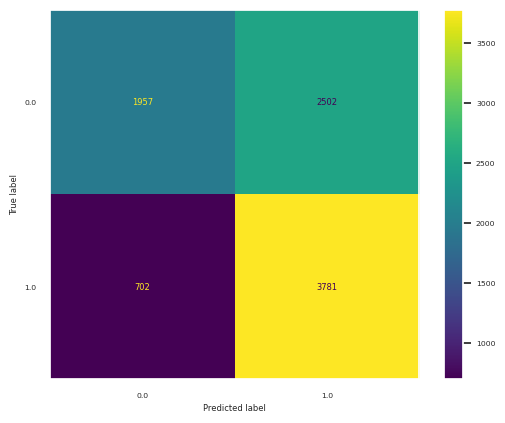

In [61]:
# Compute values for confusion matrix
### YOUR CODE HERE ###
log_cm = confusion_matrix(y_test_final, y_pred, labels=log_clf.classes_)
# Create display of confusion matrix
### YOUR CODE HERE ###
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)
# Plot confusion matrix
### YOUR CODE HERE ###
log_disp.plot()
# Display plot
### YOUR CODE HERE ###
plt.grid(False)
plt.show()

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

In [69]:
# Create a classification report
### YOUR CODE HERE ###
# WITH video_transcription_length included! increased accuracy by 1 percent!
(3781 + 2044) / (3781 + 702 + 2502 + 1957)
target_labels = ['verified', 'not verified']
print(classification_report(y_test_final, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

    verified       0.74      0.44      0.55      4459
not verified       0.60      0.84      0.70      4483

    accuracy                           0.64      8942
   macro avg       0.67      0.64      0.63      8942
weighted avg       0.67      0.64      0.63      8942



### **Task 4c. Interpret model coefficients**

In [72]:
# Get the feature names from the model and the model coefficients (which represent log-odds ratios)
# Place into a DataFrame for readability
### YOUR CODE HERE ###
pd.DataFrame(data={'Feature Name': log_clf.feature_names_in_, 'Model Coefficient': log_clf.coef_[0]})

,Feature Name,Model Coefficient
0,video_duration_sec,0.001396
1,video_view_count,-0.000002
2,video_share_count,0.000006
3,video_download_count,-0.000005
4,video_comment_count,-0.000747
5,video_transcription_length,0.003603
6,claim_status_opinion,0.000072
7,author_ban_status_banned,-0.000004
8,author_ban_status_under review,-0.000001


### **Task 4d. Conclusion**

1. What are the key takeaways from this project?

2. What results can be presented from this project?

==> ENTER YOUR RESPONSE TO QUESTIONS 1 AND 2 HERE
- The dataset improved accuracy by 1% when we add video_transcription_length or length of transcription as a feature in the model. We decided to drop 'video_like_count' from the model building.
- We had a few strongly correlated variables which might lead to multicollinearity issues when fitting a logistic regression model.
- Based on the logistic regression model, each additional second of the video is associated with 0.014 increase in log-odds of the user having a verified status.
- Based on the logistic regression model, each additional length of video transcription is associated with .0036 increase in log-odds of user having verified status.
- The logistic regression model has fair predictive power with precision of 60% being not ideal and recall being 84 percent. We can remove the video_transcription_length feature for a 1% boost in precision.
- Overall accuracy is lower than what is typically considered acceptable.

We developed a logistic regression model for verified status based on video features. The model had decent predictive power. Based on the estimated model coefficients from the logistic regression, longer videos tend to be associated with higher odds of the user being verified. Other video features have small estimated coefficients in the model, so their association with verified status seems to be small.


**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged. 